In [8]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
file_path = "E:\Projects\Sentiment Analysis Project DEPI\IMDB_Balanced_10000_Rows.csv"
df = pd.read_csv(file_path)
print(df.head)

<bound method NDFrame.head of                                                  review sentiment
0     Starts really well, nice intro and build up fo...  negative
1     Terrific movie: If you did not watch yet, you ...  positive
2     I've seen hundreds of silent movies. Some will...  positive
3     i had been looking for this film for so long b...  positive
4     Good: Engaging cinematic firefights, great pre...  positive
...                                                 ...       ...
9995  I almost made a fool of myself when I was goin...  negative
9996  I feel it is my duty as a lover of horror film...  negative
9997  Why was this film made? What were the creators...  negative
9998  If it is true that sadomasochism is a two-side...  positive
9999  Now I did watch this when it first came out on...  negative

[10000 rows x 2 columns]>


In [6]:
# stop words to be removed later
custom_stopwords = set(stopwords.words('english'))  
# Make sure 'review' is a valid column name
print(df.columns)  

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
      ## CLEANING
      # remove special characters
      text = re.sub(r'\W+', ' ', text)  
      # remove digits
      text = re.sub(r'\d+', '', text)
      ## LOWERCASING
      text = text.lower()
      ## TOKENIZATION
      words = text.split()
      ## REMOVE STOPWORDS
      words = [w for w in words if w not in custom_stopwords] 
      ## APPLY LEMMATIZATION
      words = [lemmatizer.lemmatize(w) for w in words]
      ## APPLY STEMMING
      words = [stemmer.stem(w) for w in words]
      return ' '.join(words)
    return ""

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)
# Show original vs processed text
print(df[['review', 'processed_review']].head(10))  

                                              review  \
0  Starts really well, nice intro and build up fo...   
1  Terrific movie: If you did not watch yet, you ...   
2  I've seen hundreds of silent movies. Some will...   
3  i had been looking for this film for so long b...   
4  Good: Engaging cinematic firefights, great pre...   
5  I say this. If you want to see art, you go to ...   
6  Hey, it's only TV. Sure, it's STAR TREK, the m...   
7  this movie has lot of downsides and thats all ...   
8  How can you tell that a horror movie is terrib...   
9  Brian De Palma's undeniable virtuosity can't r...   

                                    processed_review  
0  start realli well nice intro build main charac...  
1  terrif movi watch yet must watch geena davi sa...  
2  seen hundr silent movi alway classic nosferatu...  
3  look film long found seen younger love second ...  
4  good engag cinemat firefight great present veh...  
5  say want see art go art galleri want see movi ... 

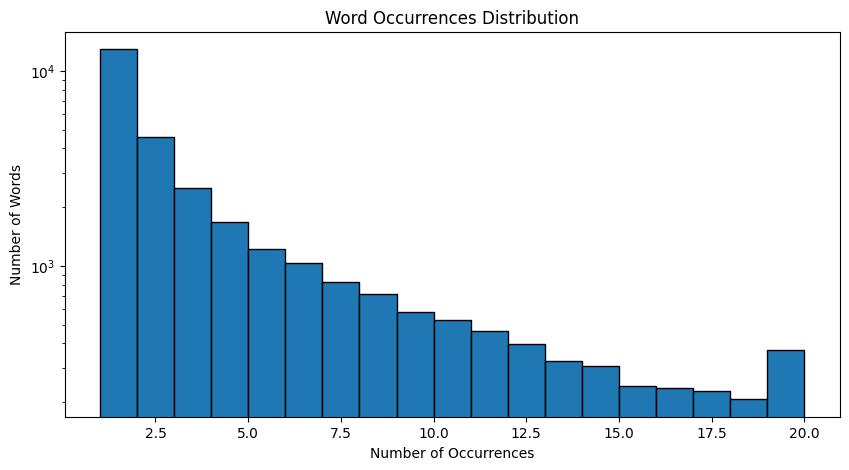

In [ ]:
# BAG OF WORDS ASSUMPTION
word_counts = Counter(" ".join(df["processed_review"]).split())
# Get word frequencies
occurrences_values = list(word_counts.values())

# Plot histogram to help decide the threshold that will be used to remove rare words later
# threshold here is the minimum number of occurrences for one word so that it will not be considered as a rare word
plt.figure(figsize=(10, 5))
plt.hist(occurrences_values, bins=range(1, 21), edgecolor='black')  # Only show words appearing ≤ 20 times 
plt.yscale('log')  # Log scale helps visualize better
plt.xlabel("Number of Occurrences")
plt.ylabel("Number of Words")
plt.title("Word Occurrences Distribution")
plt.show()

In [ ]:
## REMOVE RARE WORDS
# Most words appear very few times (1-5 occurrences)
# The count drops significantly as frequency increases  
# we will take a threshold of 4 which Keeps moderately rare words that might still carry meaning but Removes very infrequent words that could add noise

threshold = 4
# Identify rare words
rare_words = {w for w, c in word_counts.items() if c <= threshold}  

def remove_rare_words(text):
    if isinstance(text, str):  # Ensure text is a string
        words = text.split()
        return ' '.join([w for w in words if w not in rare_words])
    return ""

# Apply to dataset
df['processed_review2'] = df['processed_review'].apply(remove_rare_words)

# Check results
print(df[['processed_review', 'processed_review2']].head(10))


                                    processed_review  \
0  start realli well nice intro build main charac...   
1  terrif movi watch yet must watch geena davi sa...   
2  seen hundr silent movi alway classic nosferatu...   
3  look film long found seen younger love second ...   
4  good engag cinemat firefight great present veh...   
5  say want see art go art galleri want see movi ...   
6  hey tv sure star trek belov bla bla great one ...   
7  movi lot downsid that could see pain long aw d...   
8  tell horror movi terribl stop laugh cours plot...   
9  brian de palma undeni virtuos realli camouflag...   

                                   processed_review2  
0  start realli well nice intro build main charac...  
1  terrif movi watch yet must watch geena davi sa...  
2  seen hundr silent movi alway classic nosferatu...  
3  look film long found seen younger love second ...  
4  good engag cinemat firefight great present veh...  
5  say want see art go art galleri want see movi ... 

In [ ]:
X = df['review']  
y = df['sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

# ////////////////////////////////
print("Training Data:")
print(pd.DataFrame({'review': X_train, 'sentiment': y_train}).head())

print("\nTesting Data:")
print(pd.DataFrame({'review': X_test, 'sentiment': y_test}).head())

Training set size: 8000
Testing set size: 2000
Training Data:
                                                 review sentiment
9254  The makers have chosen the best people for the...  positive
1561  Obviously, there wasn't a huge budget for this...  positive
1670  I turned this off within the first five minute...  negative
6087  I just want to say that I am so glad somebody ...  positive
6669  What was I thinking when I rented this one? Wh...  negative

Testing Data:
                                                 review sentiment
6252  Wow - Thank god I was on an airplane and could...  negative
4684  Not only was the plot of this film contrived w...  negative
1731  This movie has the most beautiful opening sequ...  positive
4742  For three quarters of an hour, the story gradu...  negative
4521  It's been a long time since such an original, ...  positive
